#### Classification


In [35]:
#import the mnist dataset

from sklearn.datasets import fetch_openml, load_files
#mnist = fetch_openml('mnist_784', cache=True)

In [36]:
#to use the cached data
from joblib import Memory

memory = Memory('~/scikit_learn_data')
fetch_openml_cached = memory.cache(fetch_openml)

In [37]:
mnist = fetch_openml_cached('mnist_784')

In [38]:
mnist.data.shape

(70000, 784)

In [39]:
#separating the features and the target
X_, y_ = mnist['data'], mnist['target']

In [40]:
X = X_.to_numpy()

In [41]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
X[0].reshape(28,28)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

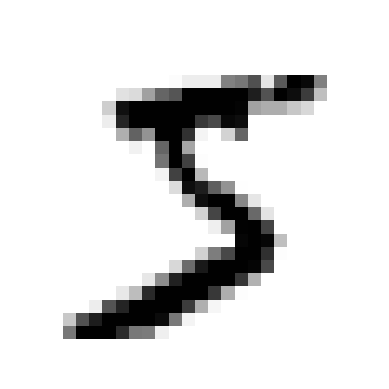

In [43]:
#Each row is has 284 features ie pixels
#Hence we need to reshape the data to make it useful

import matplotlib as mpl
import matplotlib.pyplot as plt


some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()

In [44]:
y_[0]   #The data label says us so

'5'

In [45]:
#since the label is a number but a string 
#we will convert it to a number
import numpy as np
y = y_.astype(np.uint8)

In [46]:
#Create a training and the test dataset 
#Data is already split into 60000,10000

In [47]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],y[60000:]

#### Training a binary classifier

In [48]:
#at first we will identify only 5

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [49]:
y_test_5

60000    False
60001    False
60002    False
60003    False
60004    False
         ...  
69995    False
69996    False
69997    False
69998     True
69999    False
Name: class, Length: 10000, dtype: bool

#### Implementing SGD

In [50]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [51]:
#now comes the prediction

sgd_clf.predict([some_digit])

array([ True])

#### Performance Measures

In [52]:
##Measuring Accuracy Using Cross-Validation

In [53]:
### Implementing Cross Validation


#same as using cross_val_score

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))
    

0.9669
0.91625
0.96785


In [54]:
### Now using cross val score

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [55]:
#Since the accuracy is well above 93% accuracy (ratio of correct predictions)

In [56]:
#So lets model a dumb classifier that predicts the elements which are not 5

In [57]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [113]:
np.zeros((len(range(12)),1),dtype='bool')
y_train_5

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

In [115]:
X_test_fold.flatten()

array([0., 0., 0., ..., 0., 0., 0.])

In [116]:
n5c = Never5Classifier()
n5c.fit(X_train,y_train_5)
sum(n5c.predict(X_test_fold.flatten()))


array([0])

In [58]:
never_5_clf = Never5Classifier()

In [59]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [60]:
#Because only 10% of the images contains images of 5

In [61]:
#This is why accuracy metrics are not preferred in classification methods
#instead confusion matrix is used

#### Confusion Matrix

In [62]:
#To compute the confusion matrix you need to have a set of predictions so that they cane
#be compared to the actual targets. You could make predictions so that they can be compared to the actual targets. You could make predictions on the test set, but lets keep it untouched for now.

In [63]:
from sklearn.model_selection import cross_val_predict

In [64]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [65]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [68]:
#in the above case TN/non-5 identified as non5
#in the above case FN/non-5 identified as 5
#in the above case FP/5 identified as non 5
#in the above case TP/5 identified as 5


#One would ideally want the FN and the FP to be zero
#TN/(TN + FP) is specificity

#precision = TP/(TP + FP)

#and recall/sensitivity or true positive rate  is the ratio of

#recall = TP/(TP + FN)

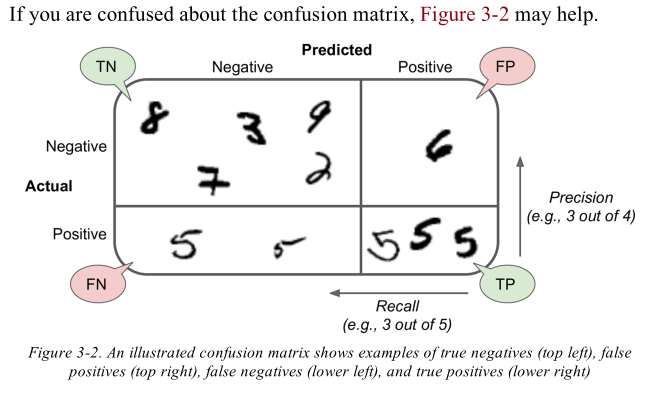

In [69]:
#calculating precision and recall

from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))
print(f'specificity {53892/(53892+1891)}')

0.8370879772350012
0.6511713705958311
specificity 0.9661007833927899


In [70]:
#It is often convenient to combine precision and recall into a single metric 
#called F1_score in particular if you need a simple way to compare two classifiers

#f1score is the harmonic mean of the precision and recall and gives much more weight
#to the lower values hence f1 score isw only high when precision and recall both 
#are high

In [71]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

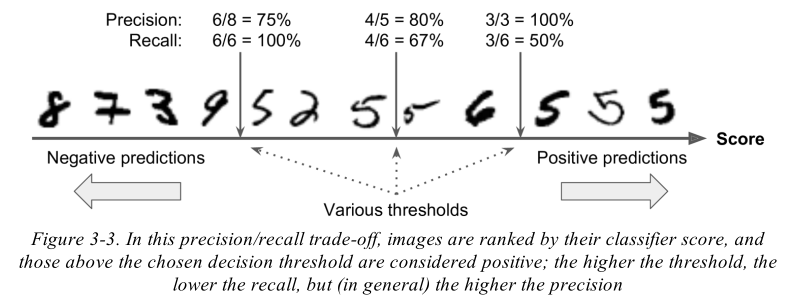

#### Precision/Recall Trade=off

In [72]:
#SGD classifier assigns a score based on a decision function for each instance
#if that score is above a threshold
#SGD assigns the instance in a positive class or negative if otherwies



#to compute that one can call the decision function 

y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [73]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [74]:
#assigning a threshold as 0
threshold  = 5000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred   #assigns false for the threshold is above the score

array([False])

In [75]:
#How do you decide which threshold to use
#lets return the decision scores instead of the predictions

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method='decision_function')

In [76]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [77]:
len(y_scores)

60000

In [78]:
#with these scores use the precision_recall_curve() function to compute precision and recall for all
#possible thresholds

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [79]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    a = plt.plot(thresholds, precisions[:-1],'b--',label='Precision')
    b = plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.legend()
    plt.xlim([-50000,50000])
    plt.grid(linestyle='--')
    plt.axvline(5000,ymax=0.88, color='red', linestyle=':')
    plt.axhline(0.915,xmax=0.56, color='red', linestyle=':')
    plt.axhline(0.4,xmax=0.55, color='red', linestyle=':')
    plt.scatter(5000,0.917,color='red')
    plt.scatter(5000,0.4,color='red')
    plt.show()

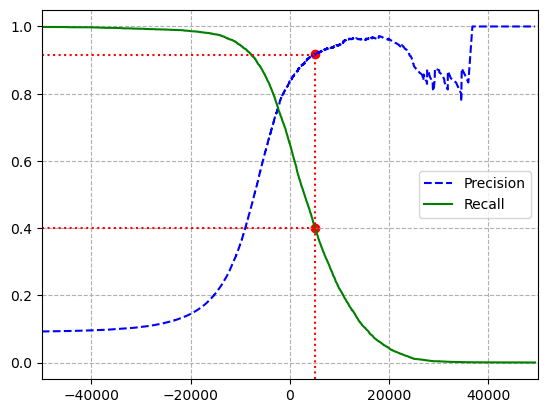

In [80]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [81]:
recalls.shape, precisions.shape, thresholds.shape

((59967,), (59967,), (59966,))

In [82]:
#another way to assess is to plot precision directly against recall

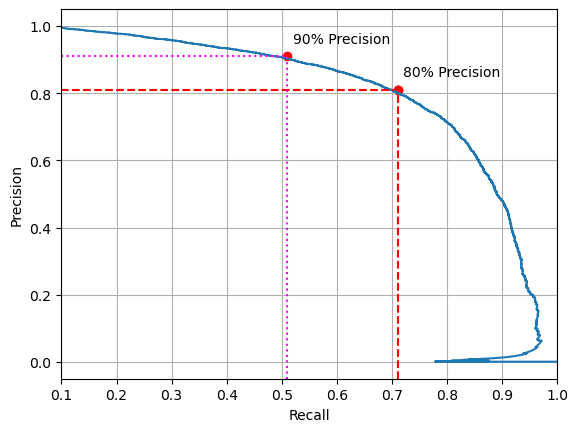

In [83]:
plt.plot(precisions[:-1], recalls[:-1])
plt.xlim((0.1,1.0))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.axvline(0.71,ymax=0.77, color='red',linestyle='--')
plt.axhline(0.81,xmax=0.67, color='red',linestyle='--')
plt.axvline(0.51,ymax=0.88, color='magenta',linestyle=':')
plt.axhline(0.91,xmax=0.45, color='magenta',linestyle=':')
plt.scatter(0.71,0.81, color='red')
plt.scatter(0.71,0.81, color='red')
plt.scatter(0.51,0.91, color='red')
plt.annotate(text='90% Precision',xy=(0.51,0.91),xytext=(0.52,0.95))
plt.annotate(text='80% Precision',xy=(0.71,0.81), xytext=(0.72, 0.85))

plt.show()

In [84]:
#However to find the max value of threshold at 90 percent precision we can use a function called np.argmax which gives the first index of the max value it encounters
thresholds_90_percent = thresholds[np.argmax(precisions[:-1] >= 0.9)]
thresholds_90_percent

3370.0194991439557

In [85]:
y_train_pred_90 = (y_scores >= thresholds_90_percent)

y_train_pred_90


array([False, False, False, ...,  True, False, False])

In [86]:
precision_score(y_train_5, y_train_pred_90)
print(recall_score(y_train_5, y_train_pred_90))
f1_score(y_train_5, y_train_pred_90)

0.4799852425751706


0.626082771896054

#### The ROC Curve (Receiver Operating Characteristics)

In [87]:
#simillar to Precision vs Recall but plots TPR vs FPR
#FPR is the negatives that are falsely classified as positives
#FPR = FP/(FP + TN)
#TNR = TN/(TN + FP) (specificity)
#TPR = TP/(TP + FN) (sensitivity)/(recall)
#precision = TP/(TP + TN)

In [88]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

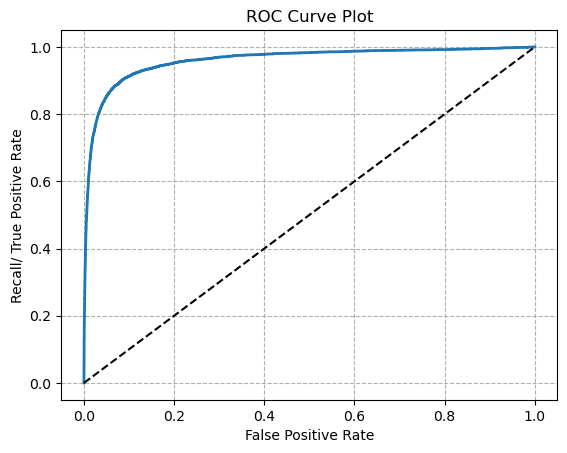

In [89]:
def roc_plot(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')  #Dashed diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel("Recall/ True Positive Rate")
    plt.title("ROC Curve Plot")
    plt.grid(linestyle='--')


roc_plot(fpr, tpr)
plt.show()

In [90]:
#The dotted line shows Roc curve of a purely random classifier
#A good classifier stays away from that line

In [91]:
#One way to compare classifiers is to measure the area under the curve (AUC) a perfect one will have AUC of 1 whereas a purely random one will have 0.5. sklearn provides a function to compute the roc auc

from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [92]:
#Choose ROC when you care about the true positives
#precision/recall curve when you care about the false positives more

#### Train a RandomForestClassifier

###### Train a RandomForestClassifier to and compare its ROC cure and ROC AUC

In [93]:
##Also the random forest classifier doesnt have decision_function() instead it has a predict_proba() method

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,method='predict_proba')

In [94]:
#The roc_curve() function expects labels and scores, but instead one can also provide class's probability

y_scores_forest = y_probas_forest[:,1]

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

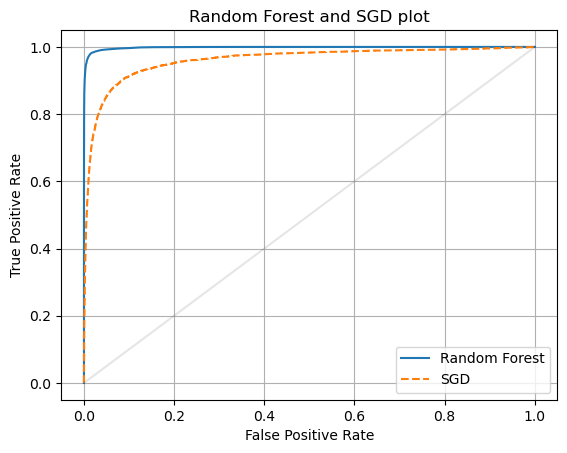

In [153]:
plt.grid()
plt.plot(fpr_forest, tpr_forest, label='Random Forest')
plt.plot(fpr,tpr,label='SGD',linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Random Forest and SGD plot")
plt.plot([0,1],[0,1],color='k',alpha=0.1)
plt.show()

In [145]:
y_scores_forest_bool = y_scores_forest > 0.5

In [146]:
y_scores_forest_bool

array([ True, False, False, ...,  True, False, False])

In [147]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score,confusion_matrix
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [148]:
y_scores_forest_bool

array([ True, False, False, ...,  True, False, False])

In [149]:
confusion_matrix(y_train_5,y_scores_forest_bool)

array([[54534,    45],
       [  725,  4696]])

In [151]:
print(precision_score(y_train_5, y_scores_forest_bool))
print(recall_score(y_train_5, y_scores_forest_bool))

0.9905083315756169
0.8662608374838591


#### Multiclass Classification

In [154]:
#Some algorithms (such as Support Vector classifiers) scale poorly with the size of the training set. For these algorithms OvO is preferred because it is faster to train many classifiers on small training sets than to train few  classifiers on large training sets. For most binary classification algorithms, however, OvR is preferred.

#SVC performs poorly on large datasets

#### Trying with SVC

In [155]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)  #y_train, not y_train_5
svm_clf.predict([some_digit])


array([5], dtype=uint8)

In [162]:
some_digit_score = svm_clf.decision_function([some_digit])   #shows 10 scores for 0 to 9
#And the score with the highest value ie 9.313 is for the number five hence it predicts five

In [165]:
#To check which number it is

print(np.argmax(some_digit_score))
svm_clf.classes_

5


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### If you want to force OneVsRestClassifier to SVC

In [1]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

KeyboardInterrupt: 